# Neural Network Regression in TensorFlow
****************************************************

- Linear regression is using input features to predict an outcome.
- Usually the output we are looking for is a number such as the price of a house.
- The deep in deep learning referres to having many many hidden layers in your neural network.

### Architecture of a neural entwork regression model

| Hyperparameter | Typical value |
|----------------|---------------|
| Input layer shape| Same shape as number of features (eg. 3 for # of bedrooms, # bathrooms, # car spaces in housing price prediciton| 
|Hidden layer(s)| Problem specific, minimum = 1, maximum = unlimited|
|Neurons per hidden layer| Problem specific, generally 10 to 100|
|Output layer shape| Same shape as desired prediction shape (eg. 1 for house price)|
|Hidden Activation| Usually ReLU (rectified linear unit)|
|Output activation | None, ReLU, logistic/tanh|
|Loss function| MSE (mean square error) or MAE (mean absolute error)/Huber(combination of MAE/MSE) if outliers|
|Optimizer| SGD (stochastic gradient descent), Adam|

This table was taken from the book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition" by Aurelien Geron.

### Introduction to Regression with Neural Networks in TensorFlow

- There are mnay definition for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number based on some other numbers.

In [1]:
import tensorflow as tf
print(tf.__version__)
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)
tf.config.list_physical_devices()


2022-10-26 09:11:19.228204: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 09:11:19.494639: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-26 09:11:19.610744: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 09:11:20.427525: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

2.10.0


2022-10-26 09:11:21.215638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 09:11:22.450589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 09:11:22.479698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 09:11:22.479836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

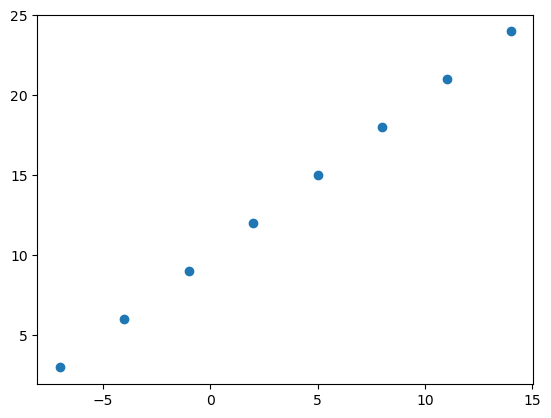

In [2]:
## Create data to view and fit.
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# Create a demo tensor for out houseing price predction problem.
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

2022-10-26 09:11:23.662354: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

2022-10-26 09:11:23.662535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 09:11:23.662608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 09:11:23.662723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 09:11:23.662799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 09:11:23.662868: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/repli

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].shape

()

- Note that we want one input tensor (in this case a scalar X) to output one output tensor (y).
- When we see that the shape returns an empty value it's a scalar value. Meaning it's a single number.

In [9]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modeling TensorFlow

- Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
- Compiling a model - define the loss functions (in other words, the function which tells our model how wrong it is), the optimizer (tells our model how to imporove the patterns its learning), and evaluation metrics (what we can use to interpret the performance of our model).
- Fitting a model - letting the model try to find patters between X and y (features and labels).

##### Steps in modelling with TensorFlow
1. Get data ready.
    - Turn our data into tensors if it is not already.
2. Build or pick a pretrained model (to suit your problem).
    - Create a model specific to our problem.
    - Compile the model.
3. Fit the model to the data and make a prediction.
4. Evaluate the model.
5. Improve through experimentation.
6. Save and reload your trained model.

In [11]:
# import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
# for device in physical_devices:
#     tf.config.experimental.set_memory_growth(device, True)
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
model.compile(loss=tf.keras.losses.mae,     # MAE (Mean Absolute Error)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
)

# 3. Fit the model.
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 922ms/step - loss: 13.1233 - mae: 13.1233
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 12.9908 - mae: 12.9908
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 12.8583 - mae: 12.8583
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 12.7258 - mae: 12.7258
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 12.5933 - mae: 12.5933


- Note tf.keras.Sequential says to do the following in sequential order...
- tf.keras.losses.mae
    - Mean Absolute Error
    - mean(abs(y_true - y_pred), axis=-1)
    - On average, how wrong are out predictions?

In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Try and make a prediction using our mode.
model.predict([17.0])

1/1 [==============================] - 0s 55ms/step


array([[4.8547325]], dtype=float32)

- In this prediction we did pretty good, but if we look at the MAE from the learning algorithm, we see that the value is around 7 or 8 ish.
- This means that the prediction is usually about 7 or 8 off from the target.

### Improving our model

- If we look at our model again:

In [15]:
# 1. Create a model using the Sequential API.
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])

# 2. Compile the model.
# model.compile(loss=tf.keras.losses.mae,     # MAE (Mean Absolute Error)
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=['mae']
# )

# 3. Fit the model.
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

1. Construct of import a pretrained model relevant to your problem.
2. Compile the model (prepare it to be used with data.)
    - LOSS - How wrong your model's predictions are compared to the truth labels (you want to minimize this).
    - OPTIMIZER - How your model should update its interal patters to better its predictions.
    - METRICS - Human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns.
    - Epochs - How many times the model will go through all the train examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)

- We can improve our model, by altering the steps we took to create a model.

1. **Create a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation of each layer.
2. **Compiling a model** - Here we might change the optimization function or the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [16]:
# 1. Create a model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model.
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 135ms/step - loss: 16.9074 - mae: 16.9074
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 16.6262 - mae: 16.6262
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 16.3449 - mae: 16.3449
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 16.0637 - mae: 16.0637
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 15.7824 - mae: 15.7824
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 15.5012 - mae: 15.5012
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 15.2199 - mae: 15.2199
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 14.9387 - mae: 14.9387
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 14.7416 - mae: 14.7416
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 14.6091 - mae: 14.6091
Epoch 11/100
1/1 [==============================] - 0s 2m

In [17]:
# Remind ourselves of the data.
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 35ms/step


array([[29.680365]], dtype=float32)

In [19]:
# 1. Create a model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

# 3. Fit the model.
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/home/drew/anaconda3/envs/tf_cert_3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 182ms/step - loss: 13.0578 - mae: 13.0578
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 12.1362 - mae: 12.1362
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2395 - mae: 11.2395
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3515 - mae: 10.3515
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.6437 - mae: 9.6437
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.9632 - mae: 8.9632
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.2690 - mae: 8.2690
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 7.5589 - mae: 7.5589
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8297 - mae: 6.8297
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.0772 - mae: 6.0772
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 5.3008 - 

2022-10-26 09:11:26.562463: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Epoch 76/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4153 - mae: 0.4153
Epoch 77/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5502 - mae: 0.5502
Epoch 78/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5261 - mae: 0.5261
Epoch 79/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3948 - mae: 0.3948
Epoch 80/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3720 - mae: 0.3720
Epoch 81/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2391 - mae: 0.2391
Epoch 82/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4050 - mae: 0.4050
Epoch 83/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4334 - mae: 0.4334
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2406 - mae: 0.2406
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3206 - mae: 0.3206
Epoch 86/100
1/1 [==============================] - 0s 2ms/step - loss

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 39ms/step


array([[27.147808]], dtype=float32)

- **NOTE** - The learning rate is potentially the most important hyperparameter that we can change in our neural network.
    - I changed the learning rate from 0.0001 to 0.01 and the result was much better.

In [21]:
# 1. Create a model (increasing to 3 layers and 100 neurons each).
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model (changing optimizer to Adam).
# Also adding a learning rate that we can adjust. Start at 0.0001.
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

# 3. Fit the model (increasing epochs 100 and ).
# model.fit(X_train_full, y_train_full, epochs=100)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 216ms/step - loss: 13.3990 - mae: 13.3990
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1481 - mae: 10.1481
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8049 - mae: 6.8049
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 4.2180 - mae: 4.2180
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.2869 - mae: 6.2869
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 6.0450 - mae: 6.0450
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 4.6838 - mae: 4.6838
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7653 - mae: 3.7653
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 4.3830 - mae: 4.3830
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 4.3068 - mae: 4.3068
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 3

In [22]:
model.predict([17.0])

1/1 [==============================] - 0s 45ms/step


array([[31.837837]], dtype=float32)

### Evaluating a model

- In practice, a trypical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evalute it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.....
```

- To tweak the network, we adjust the hyperparameters.
- A hyperparamter is an adjustment we can make to the network itself.
- A parameter is usually the patterns that the neural network learns; we don't code these ourselves.
- Tweakable hyperparameters:
    - Adding layers
    - Increasing the number of hidden units
    - Changing the activation function
    - Changing the optimization function
    - Fitting on more data
    - Fitting for longer

- When it comes to evaluation... there are 3 words you should memorize:
>"Visualize, visualize, visualize"
- It's a good idea to visualize:
    - **The data** - What data are we working with? What does it look like?
    - **The model** - What does our model look like?
    - **The training of a model** - How does a model perform while it learns?
    - **The predictions** - How do the predictions of a model line up against the groud truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)  # Between -100 and 100 with steps of 4.
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset.
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

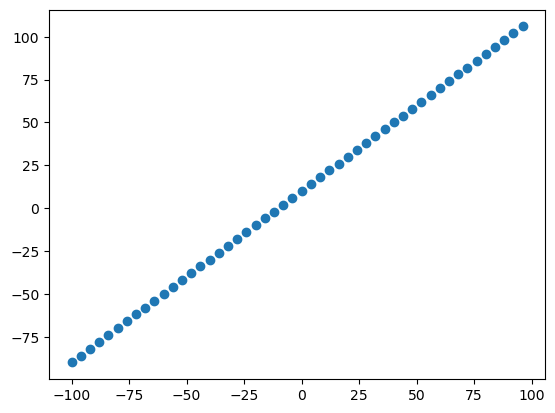

In [25]:
# Visualize the data.
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

- A concept in machine learning.
- Splitting your data into separate sets for training, testing, and validation.
- **Training set** - the model learns from this data, which is typically 70 to 80% of the total data you have available.
- **Validation set** - the model gets tuned on this data, which is typically 10 to 15%of the data available.
- **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10 to 15% of the total data availble.


In [26]:
# check the legth of how many samples we have.
len(X)

50

In [27]:
# Split the data into train and test sets.
X_train = X[:40]    # First 40 are training samples (80% of the data).
X_test = X[40:]     # Last 10 are testing samples (20% of the data).

y_train = y[:40]    # First 40 are training samples (80% of the data).
y_test = y[40:]     # Last 10 are testing samples (20% of the data).

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [28]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Visualizing the data

- Now we've got our data in training and test sets... let's visualize it again!

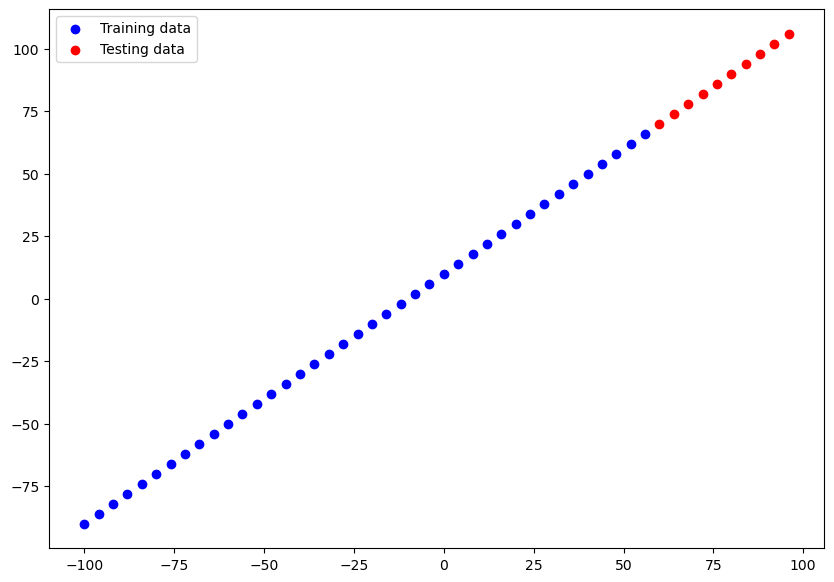

In [29]:
plt.figure(figsize=(10, 7))
# Plot training data in blue.
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in red.
plt.scatter(X_test, y_test, c='r', label='Testing data')
# Show a legend.
plt.legend();

In [30]:
# Let's have a look at how to build a neural network for our data.

# 1. Create a model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10)
])

# 2. Compile the model.
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model.
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

- We can get a look at our model before we've run it using model.summary.

In [31]:
# Will show an error because the model is not built.
# model.summary()

In [32]:
# Let's create a model that builds automatically by defining the input_shape argument in the first layer.
tf.random.set_seed(42)

# 1. Create a model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),   # We are predicting one number (a scalar) so we only need a shape of 1.
    tf.keras.layers.Dense(1, name="output_layer")
], name="One_of_Many")                                              # Also, a dense layer is a layer that is 'fully connected' or 'saturated'.

# 2. Compile the model.
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=['mae']
)

In [33]:
model.summary()

Model: "One_of_Many"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


- **Total params** - Total number of paramters in the model.
- **Trainable params** - These are the paramters (patterns) the model can update as it trains.
- **Non-trainable params** - There are paramters that are not updated during training; this is typical when you bring in already learned patterns or paramters during **transfer learning**.
- When might trainable params and non-trainable params look different?
    - When we import already trained or partially trained models we can freeze certain connections or weights
    - This will result in non-trainable paramters that won't change during training.

- **Extra resource for this chapter** - Check out MIT's introduction to deep learning video.
- **Exercise** - Try playing around with the number of hidden units in the dense layer, see how that effects the number of paramters (total and trainable) by calling `model.summary()`.
- For a recap on this challenge, see 15:00 of Evaluating a tensorflow model part 3 (getting model summary).

In [34]:
# Let's fit our model to the training data.
model.fit(X_train, y_train, epochs=100, verbose=0)

In [35]:
# Get a summary of our model.
model.summary()

Model: "One_of_Many"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


- We can visualize our model using one of the utility functions.

In [36]:
from tensorflow.keras.utils import plot_model

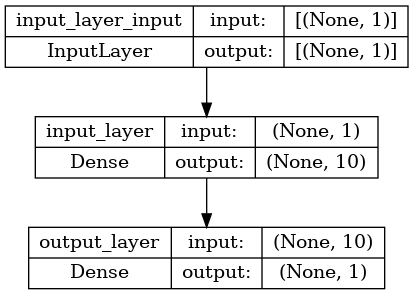

In [37]:
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions.

- To visualize predictions, it's a good idea to plot them against the ground truth labels.

- Often you'll see this in the forom of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [38]:
# Make some predictions.
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 27ms/step


array([[35.03224 ],
       [37.27218 ],
       [39.512115],
       [41.75205 ],
       [43.99198 ],
       [46.23192 ],
       [48.471855],
       [50.711792],
       [52.95173 ],
       [55.19166 ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

- **Note** - If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [40]:
# Let's create a plotting function.
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
    """
    Plots training data, test data, and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue.
    plt.scatter(train_data, train_labels, c="b", label="Training_data")
    # Plot testing data in green.
    plt.scatter(test_data, test_labels, c="g", label="Test_data")
    # Plot model's predictions in red.
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend.
    plt.legend()
    plt.show()
    

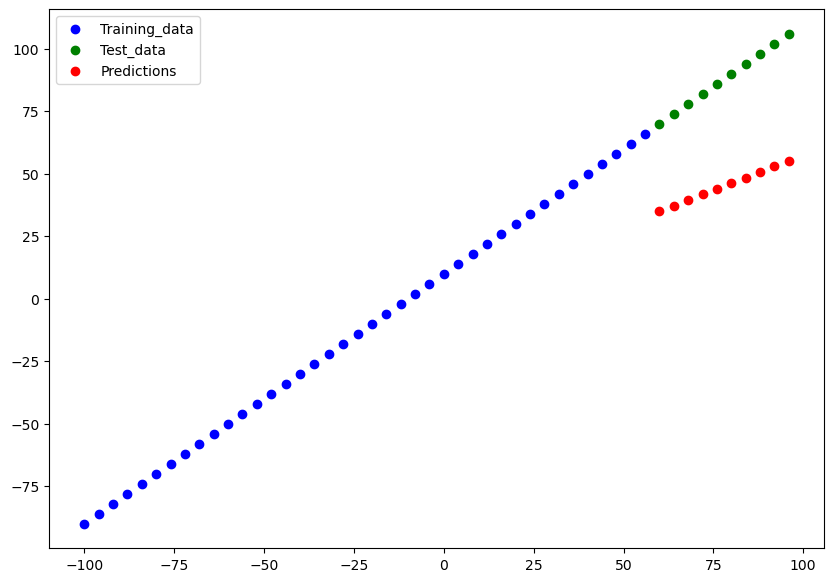

In [41]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics.

- Depending on the problem you're woroking on, there will be different evaluation metrics to evaluate your model's performance.
- Since we're working on a regression, two of the main metrics:
    - MAE - Mean Absolute Error, "On average, how wrong is each of my model's predictions?"
    - MSE - Mean Square Error, "Square the average errors".

- y = known true values.
- x = model prediction.
- n = number of values/predictions.
##### Mean Absolute Error (MAE)
> (SUM {n} {i=1} abs(y - x))) / n
- Take the sum of all the absolute values of the differences between true values and the predicted values. Divide by the number of values.
- In TensorFlow code:
    - tf.keras.losses.MAE()
    - tf.metrics.mean_absolute_error()
- **USE** - As a good starter metric of any regression problem.
##### Mean Square Error (MSE)
> (SUM {n} {i=1} (y - x)^2) / n
- Take the sum of all the squares of the differences between true values and the predicted values. Divide by the number of values.
- In TensorFlow code:
    - tf.keras.losses.MSE()
    - tf.metrics.mean_square_error()
- **USE** - When larger errors are more significant than smaller errors.
##### Huber
- {{https://en.wikipedia.org/wiki/Huber_loss}}
- In TensorFlow code:
    - tf.keras.losses.Huber()
- **USE** - Combination of MSE and MAE. Less sensitive to outliers than MSE.


In [42]:
# Evaluate the model on the test set.
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 70ms/step - loss: 42.8881 - mae: 42.8881


[42.8880500793457, 42.8880500793457]

In [43]:
tf.cast(y_test, dtype=tf.float32), tf.squeeze(tf.constant(y_pred))

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([35.03224 , 37.27218 , 39.512115, 41.75205 , 43.99198 , 46.23192 ,
        48.471855, 50.711792, 52.95173 , 55.19166 ], dtype=float32)>)

In [44]:
# Calculate the mean absolute error.
tf.keras.losses.MAE(y_true=y_test, 
                    y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=42.88805>

In [45]:
# Calculate the mean square error.
tf.metrics.mean_squared_error(y_true=y_test,
                              y_pred=tf.squeeze(y_pred)
)

<tf.Tensor: shape=(), dtype=float32, numpy=1864.9417>

In [46]:
# Make a little wrapper function for MAE and MSE.
# MAE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
# MSE
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweat it -> etc.
```
- Practitioner's Moto
>Experiment, Experiment, Experiment...
1. Get more data - get more examp0les for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

In [47]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

- Let's do 3 modeling experiments.
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
- Note each experiment we change only one parameter.

In [48]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [49]:
# Build model_1
tf.random.set_seed(42)
X_train, y_train

# 1. Create the model.
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model.
model_1.fit(np.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 66.2729 - mae: 66.2729
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 31.1633 - mae: 31.1633
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 10.0308 - mae: 10.0308
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 12.3118 - mae: 12.3118
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 11.3667 - mae: 11.3667
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 10.4878 - mae: 10.4878
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 9.4566 - mae: 9.4566
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 9.3171 - mae: 9.3171
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 7.5387 - mae: 7.5387
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 12.5712 - mae: 12.5712
Epoch 11/100
2/2 [==============================] - 0s 1ms/step -

In [50]:
# X_train.shape, np.expand_dims(X_train, -1).shape, X_train

1/1 [==============================] - 0s 26ms/step


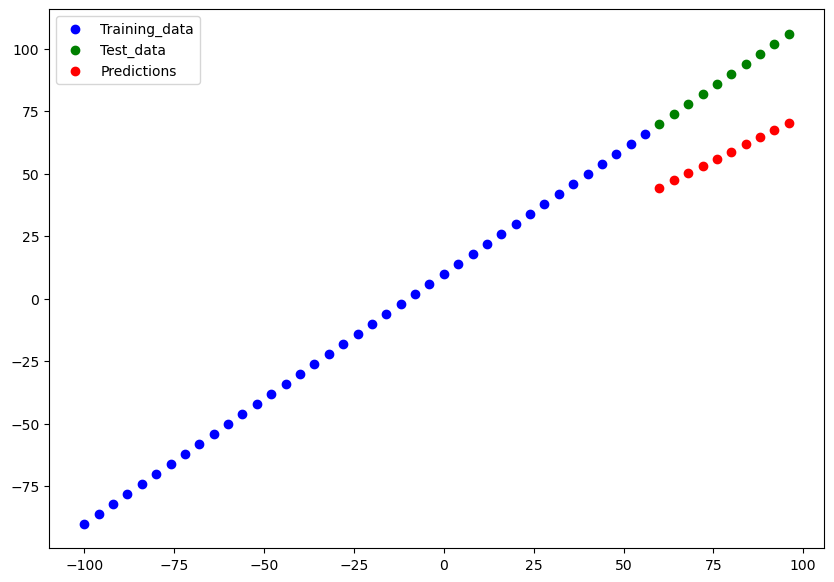

In [51]:
# Make and plot predictions for model_1.
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [52]:
# Calculate model_1 evaluation metrics.
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.595154>,
 <tf.Tensor: shape=(), dtype=float32, numpy=946.44324>)

In [53]:
# 1. Create the model.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse']
)

# 3. Fit the model.
model_2.fit(np.expand_dims(X_train, -1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 12ms/step
[[103.765656]]


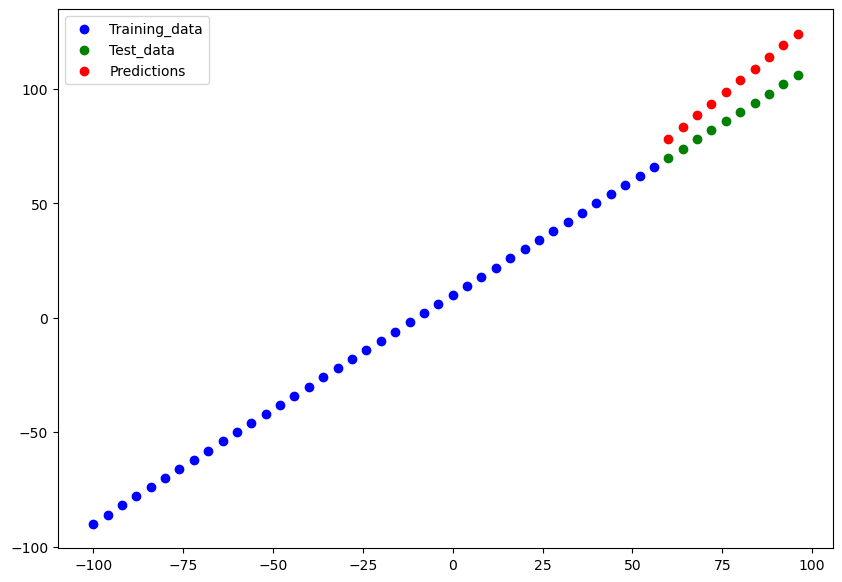

In [54]:
# Visualize the output.
y_preds_2 = model_2.predict(X_test)
print(model_2.predict(tf.constant([80])))
plot_predictions(predictions=y_preds_2)

2/2 [==============================] - 0s 2ms/step


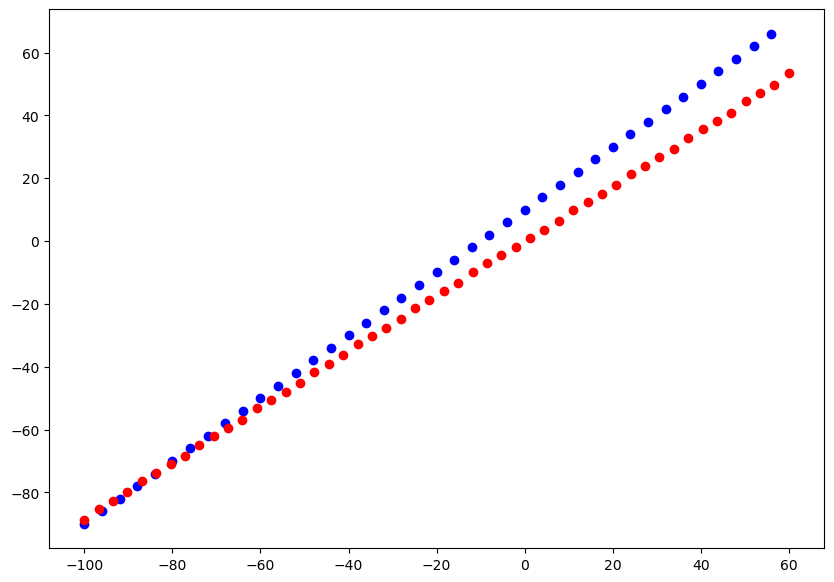

In [55]:

# 1. Create the model.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.0003),
                metrics=['mae']
)

# 3. Fit the model.
model_2.fit(np.expand_dims(X_train, -1), y_train, epochs=100, verbose=0)

# Predict another set.
x_test_data = tf.constant(np.linspace(-100, 60, 50))
y_prediction = model_2.predict(x_test_data)
y_prediction
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b")
plt.scatter(x_test_data, y_prediction, c='r')


# plot_predictions(predictions=y_prediction, test_data=x_test_data)

In [56]:
# Evaluate the results.
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.215723>,
 <tf.Tensor: shape=(), dtype=float32, numpy=184.63496>)

In [57]:
# 1. Create the model.
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
)

# 3. Fit the mode.
model_3.fit(np.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 48.1091 - mae: 48.1091
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 31.2988 - mae: 31.2988
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 36.3922 - mae: 36.3922
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 27.1689 - mae: 27.1689
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 14.8495 - mae: 14.8495
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 11.8217 - mae: 11.8217
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 12.9187 - mae: 12.9187
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 11.1260 - mae: 11.1260
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 40.7096 - mae: 40.7096
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 28.0977 - mae: 28.0977
Epoch 11/500
2/2 [==============================] - 0s 1ms/

1/1 [==============================] - 0s 29ms/step


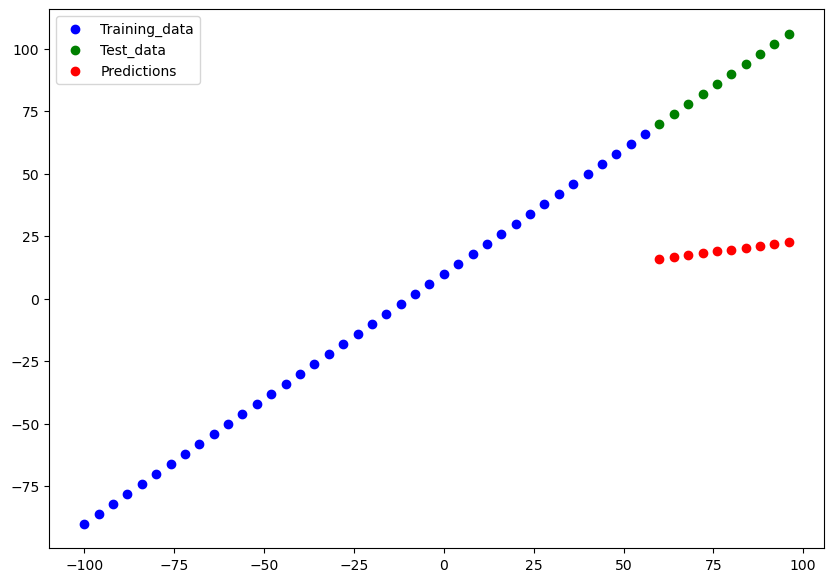

In [58]:
# Visualize the results.
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [59]:
# Evaluate the data.
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.693054>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4805.1133>)

In [60]:
# Let's compare our model's results using a pandas DataFrame.
import pandas as pd

In [61]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()], 
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.595154,946.443237
1,model_2,13.215723,184.634964
2,model_3,68.693054,4805.113281


- Looks like model_2 performed the best...

In [62]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


- **Note** - One of your main goals should be to minimize the time between your experiments.
- The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.
- Remember the machine learning practitioner's motto: "Experiment, experiment, experiment."

### Tracking your experiments.

- One really good habit in machine learning modelling is to track the results of your experiments.
- And when doing so, it can be tedious if you're running lots of experiments.
- Luckily, there are tools to help us!
- **Resources** - As you build more models, you'll want to look into using:
    - TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll se this one later).
    - Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

### Saving our models.

- Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.
- There are two main formats we can save our model's to:
    1. The SavedModel format
    2. The HDF5 format

In [63]:
# Save model using the SavedModel format.
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [64]:
# Save model using the HDF5 format.
model_2.save("best_model_HDF5_format.h5")

### Loading our models.



In [65]:
# Load in the SavedModel format model compare model architectures.
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary() == model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
No

True

In [66]:
# Compare model_2 predictions with SavedModel format model predictions.
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 26ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [67]:
# Load in a model using the .h5 format.
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary() == model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
No

True

In [68]:
# Check the predictions.
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 29ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model from Google Colab

- If you're in Google Colab, you can download your models either by clicking on the three dots next to the saved model (after you've made a model) or you can enter the following code to download using code:
```python
from google.colab import files
    files.download("filepath/filename")
```

# A Larger Example



In [124]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

- Read in the insurance dataset.
- Use pandas to read in a csv from a github repo directly.
- insurance here is a DataFrame

In [125]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [126]:
# First we need to numerically encode any string features in our data
# Let's use one-hot encoding and pd.get_dummies.
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


##### Challenge before next video.

- Create X and y values (features and labels)
- Create training and test sets
- Build a neural network (sort of like model_2 above)

In [127]:
# Separate features and labels.
y = insurance_one_hot['charges']
X = insurance_one_hot.loc[:, insurance_one_hot.columns != 'charges']

In [128]:
# Create training and test sets.
# This will place first 80% in a training set and last 20% in a testing set.
# train_size = int(len(X) * 0.8)
# train_size, test_size
# X_train = X[:train_size]
# X_test = X[train_size:]
# y_train = y[:train_size]
# y_test = y[train_size:]

In [129]:
# A better way to do this is to use the train_test_split from scikitlearn.
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [159]:
# Build a neural network.

# Set random.
tf.random.set_seed(42)

# 1. Create our model.
model_ins = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model.
model_ins.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=['mae']
)

# 3. Fit out model.
history = model_ins.fit(np.expand_dims(X_train,-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13218.7441 - mae: 13218.7441
Epoch 2/100
34/34 [==============================] - 0s 974us/step - loss: 12292.0293 - mae: 12292.0293
Epoch 3/100
34/34 [==============================] - 0s 993us/step - loss: 12171.6172 - mae: 12171.6172
Epoch 4/100
34/34 [==============================] - 0s 995us/step - loss: 12096.0918 - mae: 12096.0918
Epoch 5/100
34/34 [==============================] - 0s 983us/step - loss: 11980.3428 - mae: 11980.3428
Epoch 6/100
34/34 [==============================] - 0s 978us/step - loss: 11791.6719 - mae: 11791.6719
Epoch 7/100
34/34 [==============================] - 0s 994us/step - loss: 11462.6426 - mae: 11462.6426
Epoch 8/100
34/34 [==============================] - 0s 979us/step - loss: 10948.7500 - mae: 10948.7500
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 10333.2822 - mae: 10333.2822
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - 

- Right now it looks like our model isn't performing too well...
- Try running some experiments to improve the model.

In [160]:
# Build a neural network.

# Set random.
tf.random.set_seed(42)

# 1. Create our model.
model_ins_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model.
model_ins_1.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=['mae']
)

# 3. Fit out model.
history_1 = model_ins_1.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 833us/step - loss: 8661.5000 - mae: 8661.5000
Epoch 2/500
34/34 [==============================] - 0s 842us/step - loss: 7879.8853 - mae: 7879.8853
Epoch 3/500
34/34 [==============================] - 0s 780us/step - loss: 7500.0005 - mae: 7500.0005
Epoch 4/500
34/34 [==============================] - 0s 808us/step - loss: 7726.6030 - mae: 7726.6030
Epoch 5/500
34/34 [==============================] - 0s 800us/step - loss: 7827.2861 - mae: 7827.2861
Epoch 6/500
34/34 [==============================] - 0s 779us/step - loss: 7559.8018 - mae: 7559.8018
Epoch 7/500
34/34 [==============================] - 0s 798us/step - loss: 7544.1680 - mae: 7544.1680
Epoch 8/500
34/34 [==============================] - 0s 782us/step - loss: 7814.7920 - mae: 7814.7920
Epoch 9/500
34/34 [==============================] - 0s 814us/step - loss: 7642.6021 - mae: 7642.6021
Epoch 10/500
34/34 [==============================] - 0s 817us/step - loss: 7736.3

In [161]:
# Build a neural network.

# Set random.
tf.random.set_seed(42)

# 1. Create our model.
model_ins_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model.
model_ins_2.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae']
)

# 3. Fit out model.
history_2 = model_ins_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 923us/step - loss: 13309.8262 - mae: 13309.8262
Epoch 2/200
34/34 [==============================] - 0s 957us/step - loss: 13150.7715 - mae: 13150.7715
Epoch 3/200
34/34 [==============================] - 0s 909us/step - loss: 12825.9619 - mae: 12825.9619
Epoch 4/200
34/34 [==============================] - 0s 965us/step - loss: 12186.6436 - mae: 12186.6436
Epoch 5/200
34/34 [==============================] - 0s 890us/step - loss: 11094.2432 - mae: 11094.2432
Epoch 6/200
34/34 [==============================] - 0s 891us/step - loss: 9649.5674 - mae: 9649.5674
Epoch 7/200
34/34 [==============================] - 0s 904us/step - loss: 8273.7930 - mae: 8273.7930
Epoch 8/200
34/34 [==============================] - 0s 887us/step - loss: 7555.6538 - mae: 7555.6538
Epoch 9/200
34/34 [==============================] - 0s 853us/step - loss: 7421.4551 - mae: 7421.4551
Epoch 10/200
34/34 [==============================] - 0s 876us/step - lo

In [181]:
# Build a neural network.

# Set random.
tf.random.set_seed(42)

# 1. Create our model.
model_ins_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model.
model_ins_3.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae']
)

# 3. Fit out model.
history_3 = model_ins_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 941us/step - loss: 13298.3066 - mae: 13298.3066
Epoch 2/500
34/34 [==============================] - 0s 886us/step - loss: 13154.8740 - mae: 13154.8740
Epoch 3/500
34/34 [==============================] - 0s 901us/step - loss: 12833.4033 - mae: 12833.4033
Epoch 4/500
34/34 [==============================] - 0s 881us/step - loss: 12186.8848 - mae: 12186.8848
Epoch 5/500
34/34 [==============================] - 0s 944us/step - loss: 11084.8770 - mae: 11084.8770
Epoch 6/500
34/34 [==============================] - 0s 949us/step - loss: 9635.5654 - mae: 9635.5654
Epoch 7/500
34/34 [==============================] - 0s 918us/step - loss: 8272.4404 - mae: 8272.4404
Epoch 8/500
34/34 [==============================] - 0s 930us/step - loss: 7562.3604 - mae: 7562.3604
Epoch 9/500
34/34 [==============================] - 0s 947us/step - loss: 7430.6807 - mae: 7430.6807
Epoch 10/500
34/34 [==============================] - 0s 921us/step - lo

In [182]:
# Check the results of the insurance model on the test data.
# model_ins = input layer 10, output layer 1, SDG, 100 epochs
# model_ins_1 = input layer 10, output layer 1, SDG, 500 epochs
# model_ins_2 = input layer 100, hidden layer 10, output layer 1, Adam, 100 epochs
# model_ins_3 = input layer 100, hidden layer 10, output layer 1, SDG, 500 epochs

model_exp_results = [["model_ins", model_ins.evaluate(X_test, y_test)[0]],
                     ["model_ins_1", model_ins_1.evaluate(X_test, y_test)[0]],
                     ["model_ins_2", model_ins_2.evaluate(X_test, y_test)[0]],
                     ["model_ins_3", model_ins_3.evaluate(X_test, y_test)[0]]]
ins_all_results = pd.DataFrame(model_exp_results, columns=["model", "mae"])
ins_all_results

9/9 [==============================] - 0s 979us/step - loss: 3172.1355 - mae: 3172.1355


,model,mae
0,model_ins,8918.914062
1,model_ins_1,4711.460449
2,model_ins_2,3495.466797
3,model_ins_3,3172.135498


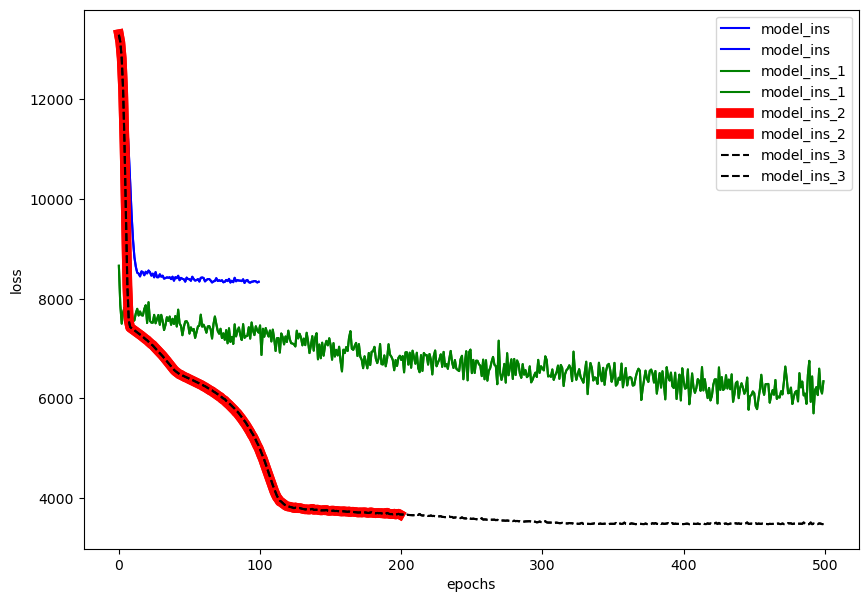

In [190]:
plt.figure(figsize=(10, 7))
plt.plot(pd.DataFrame(history.history), c='b', label='model_ins')
plt.plot(pd.DataFrame(history_1.history), c='g', label='model_ins_1')
plt.plot(pd.DataFrame(history_2.history), c='r', lw=7, label='model_ins_2')
plt.plot(pd.DataFrame(history_3.history), c='black', ls='--', label='model_ins_3')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [191]:
import seaborn as sns

<AxesSubplot:>

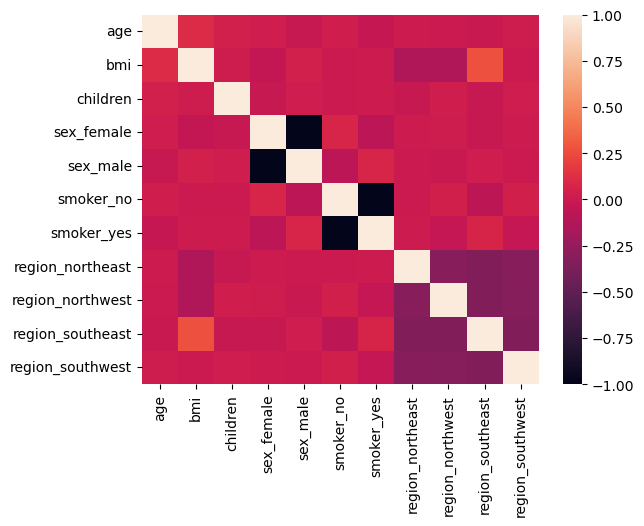

In [193]:
sns.heatmap(X.corr())

- **Question** - How long should you train for?
- It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback.
- Read more here: {{https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping}}

### Preprocessing data (normalization and standardization)

- We've already one-hot encoded our data and we've already turned it into tensors.
- We can do one more step to improve our preprocessing.
- We can scale our features to normalize or standardize our data.
    - Neural networks tend to prefer normalization.
- Read up{{https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02}}

<AxesSubplot:ylabel='Frequency'>

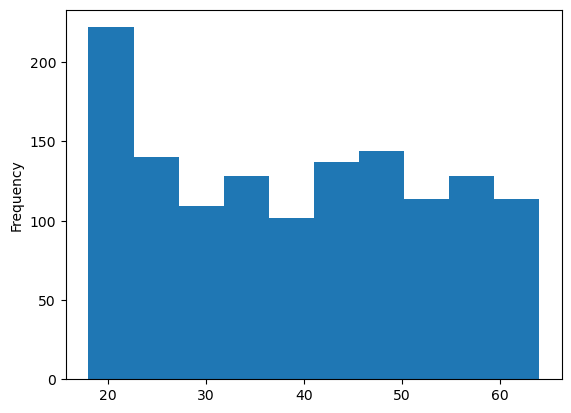

In [199]:
X['age'].plot(kind="hist")

##### Normalization
- The goal of normalization (also referred to as scaling your data) is to change the values of numeric columns in the dataset to a common scale without distorting differences in the ranges of values.
    - Note that the range for this value is between 20 and 60 about.
    - Neural networks like when the values are between 0 and 1.
    - We can normalize the data by keeping the differences between all the data points, but squishing it down to a smaller scale.
- Scikit-learn function
    - MinMaxScaler
- What it does?
    - Converts all values to between 0 and 1 whilst preserving the original distribution.
- When to use?
    - Use as default scaler with neural networks.

##### Standardization

- Scikit-learn function
    - StandardScaler
- What it does?
    - Removes the mean and divides each value by the standard deviation.
- When to use?
    - Transform a feature to have close to normal distribution (caution: this reduces the effect of outliers).

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read csv
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- To prepare data, we can borrow a few classes from Scikit-Learn.

In [201]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer.
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),   # Turn all values in these columns between 0 and 1.
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y.
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data.
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler and OneHotEncoder).
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [203]:
# What does out data look like now?
# Before normalization.
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [205]:
# After normalization.
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [206]:
# How has our shapes changed?
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

- Our data has been normalized and one hot encoded.
- New let's build a neural network model on it.

##### Challenge; build a neural network to fit our normalized data.

In [211]:
# 1. Create our model.
model_ins_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model.
model_ins_normal.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit our model.
history_normal = model_ins_normal.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 918us/step - loss: 13344.1445 - mae: 13344.1445
Epoch 2/200
34/34 [==============================] - 0s 863us/step - loss: 13336.2891 - mae: 13336.2891
Epoch 3/200
34/34 [==============================] - 0s 870us/step - loss: 13316.8213 - mae: 13316.8213
Epoch 4/200
34/34 [==============================] - 0s 879us/step - loss: 13276.1553 - mae: 13276.1553
Epoch 5/200
34/34 [==============================] - 0s 875us/step - loss: 13203.7031 - mae: 13203.7031
Epoch 6/200
34/34 [==============================] - 0s 896us/step - loss: 13088.2070 - mae: 13088.2070
Epoch 7/200
34/34 [==============================] - 0s 868us/step - loss: 12918.5879 - mae: 12918.5879
Epoch 8/200
34/34 [==============================] - 0s 865us/step - loss: 12684.2881 - mae: 12684.2881
Epoch 9/200
34/34 [==============================] - 0s 895us/step - loss: 12375.0625 - mae: 12375.0625
Epoch 10/200
34/34 [==============================] - 0s 905us/s

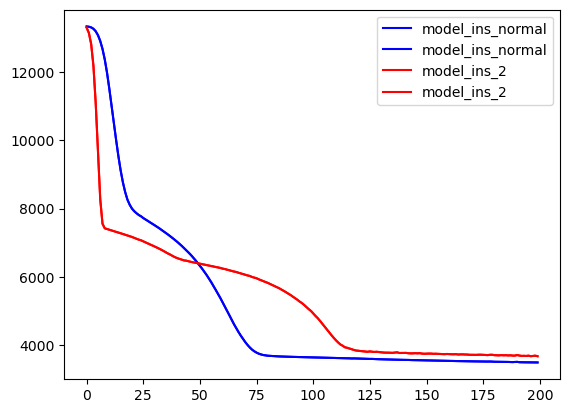

In [216]:
plt.plot(pd.DataFrame(history_normal.history), c="b", label='model_ins_normal')
plt.plot(pd.DataFrame(history_2.history), c="r", label='model_ins_2')
plt.legend()

- Comparing our model with the best performing model with non-normalized data, we can see than our new model with normalized data reaches a local minimum faster than our old model.

### Challanges and Extra Curriculum

- Think of a regression problem you've come into contact with before, what is it?
- What would the inputs be?
- What would the ideal outputs be?
